In [172]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [168]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

#color scheme
colormap = cm.jet

In [163]:
print(colormap(10000))

(0.0, 1.0, 0.5, 1.0)


In [201]:
def histosFromFiles(folder, nbins):
    
    #reading files with histos info
    files = glob.glob( folder+'/*.dat')
    print(files)
    
    
    #reading cross sections and luminocities to calculate weights
    sigmaLumi=[]
    with open (folder+'/cross-section_lumi.txt', 'r') as f:
        for row in csv.reader(f,delimiter='\t'):
            sigmaLumi.append(row)
    sigmaLumi=sigmaLumi[1:]
    print(sigmaLumi)
    
    normalize = mcolors.Normalize(0, len(files))
    
    global usedcolors
    usedcolors=[]
    for filenum, file in enumerate(files):
        histoarray = np.array(genfromtxt(file))
        
        n, bins, patches = plt.hist(histoarray, bins=nbins, weights=np.full(histoarray.size,1/histoarray.size),\
                            alpha=0.7, rwidth=1, color=colormap(normalize(filenum)))
        usedcolors.append(colormap(normalize(filenum)))
    #print(usedcolors)

['histos/pT/pTl_100.dat', 'histos/pT/pTl_500.dat', 'histos/pT/pTl_300.dat']
[['pTl_100.dat', '0.668', '300'], ['pTl_300.dat', '0.0119', '300'], ['pTl_500.dat', '0.00141', '300']]


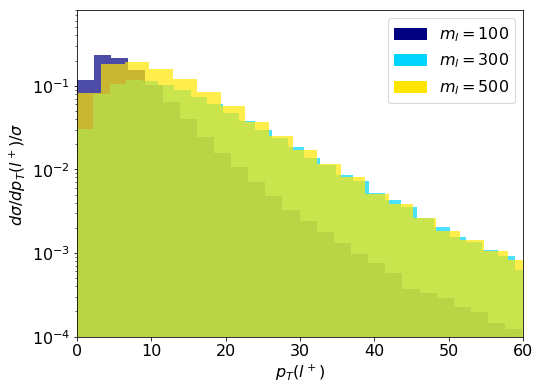

In [206]:
#printing pT

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pT',60)


plt.xlim(0,60)
plt.ylim(10**(-4),8*10**(-1))
plt.yscale("log")

plt.xlabel('$p_T(l^+)$')
plt.ylabel('$d\\sigma/d p_T(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_l=100$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_l=300$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_l=500$')
plt.legend(handles=[patch1, patch2, patch3],loc='upper right')

#plt.savefig('ptl_bencmark.png')